In [1]:
!git clone https://github.com/charvishukla/cse151a-pokemon-project.git

fatal: destination path 'cse151a-pokemon-project' already exists and is not an empty directory.


# Milestone 2:  Data Exploration & Initial Preprocessing

# Imports 

In [76]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. Loading Datasets:

In [79]:
pokemon_TCG= pd.read_csv("pokemon-tcg-dataset(1999-2023).csv")
pokemon_TCG.describe()

,hp,convertedRetreatCost
count,14536.000000,13678.000000
mean,104.839708,1.699664
std,61.041205,0.866636
min,10.000000,1.000000
25%,60.000000,1.000000
50%,80.000000,1.000000
75%,130.000000,2.000000
max,340.000000,5.000000


In [81]:
price_guide = pd.read_csv("price-guide.csv", low_memory=False)
price_guide.describe()

,id,gamestop-price,gamestop-trade-price,upc,sales-volume,genre,asin,epid
count,6.029600e+04,0.0,0.0,1.000000e+00,60296.000000,0.0,0.0,0.0
mean,3.126286e+06,NaN,NaN,8.206501e+11,37.243996,NaN,NaN,NaN
std,2.003219e+06,NaN,NaN,NaN,111.923299,NaN,NaN,NaN
min,2.522800e+04,NaN,NaN,8.206501e+11,1.000000,NaN,NaN,NaN
25%,9.592028e+05,NaN,NaN,8.206501e+11,2.000000,NaN,NaN,NaN
50%,3.457958e+06,NaN,NaN,8.206501e+11,7.000000,NaN,NaN,NaN
75%,4.614387e+06,NaN,NaN,8.206501e+11,23.000000,NaN,NaN,NaN
max,7.747398e+06,NaN,NaN,8.206501e+11,11000.000000,NaN,NaN,NaN


# 2. Exploratory Data Analysis: Price Guide Dataset

### Shape of the dataset:
Note that the price guide dataset was scraped from the internet using the price charting API available with a premium Price Charts Subscription. We scraped 60296 examples with 27 features (i.e. 60296 rows and 27 columns). 

In [84]:
print("Dataset Shape ", price_guide.shape)

Dataset Shape  (60296, 27)


We will begin by exploring the data types of all columns in the price_guide DataFrame. 

In [87]:
price_guide.columns

Index(['id', 'console-name', 'product-name', 'loose-price', 'cib-price',
       'new-price', 'graded-price', 'box-only-price', 'manual-only-price',
       'bgs-10-price', 'condition-17-price', 'condition-18-price',
       'gamestop-price', 'gamestop-trade-price', 'retail-loose-buy',
       'retail-loose-sell', 'retail-cib-buy', 'retail-cib-sell',
       'retail-new-buy', 'retail-new-sell', 'upc', 'sales-volume', 'genre',
       'tcg-id', 'asin', 'epid', 'release-date'],
      dtype='object')

### Number of Null rows by column:

We need to determine the number of entries in each column. This will help us reason about which columns are the best to keep based on their values. To do so, we will use the `.isna()` function from Pandas Library. 

In [90]:
print('Number of null rows by column name:')
print('id', price_guide['id'].isna().sum())
print('console-name:', price_guide['console-name'].isna().sum())
print('product-name:', price_guide['product-name'].isna().sum())
print('loose-price:', price_guide['loose-price'].isna().sum())
print('cib-price:', price_guide['cib-price'].isna().sum())
print('new-price:', price_guide['new-price'].isna().sum())
print('graded-price:', price_guide['graded-price'].isna().sum())
print('box-only-price:', price_guide['box-only-price'].isna().sum())
print('manual-only-price:', price_guide['manual-only-price'].isna().sum())
print('bgs-10-price:', price_guide['bgs-10-price'].isna().sum())
print('condition-17-price:', price_guide['condition-17-price'].isna().sum())
print('condition-18-price:', price_guide['condition-18-price'].isna().sum())
print('gamestop-price:', price_guide['gamestop-price'].isna().sum())
print('gamestop-trade-price:', price_guide['gamestop-trade-price'].isna().sum())
print('retail-loose-buy:', price_guide['retail-loose-buy'].isna().sum())
print('retail-loose-sell:', price_guide['retail-loose-sell'].isna().sum())
print('retail-cib-buy:', price_guide['retail-cib-buy'].isna().sum())
print('retail-cib-sell:', price_guide['retail-cib-sell'].isna().sum())
print('retail-new-buy:', price_guide['retail-new-buy'].isna().sum())
print('retail-new-sell:', price_guide['retail-new-sell'].isna().sum())
print('upc:', price_guide['upc'].isna().sum())
print('sales-volume:', price_guide['sales-volume'].isna().sum())
print('genre:', price_guide['genre'].isna().sum())
print('tcg-id:', price_guide['tcg-id'].isna().sum())
print('asin:', price_guide['asin'].isna().sum())
print('epid:', price_guide['epid'].isna().sum())
print('release-date:', price_guide['release-date'].isna().sum())


Number of null rows by column name:
id 0
console-name: 0
product-name: 0
loose-price: 6021
cib-price: 49388
new-price: 42160
graded-price: 23691
box-only-price: 23446
manual-only-price: 23412
bgs-10-price: 23397
condition-17-price: 23155
condition-18-price: 23402
gamestop-price: 60296
gamestop-trade-price: 60296
retail-loose-buy: 39523
retail-loose-sell: 6021
retail-cib-buy: 49912
retail-cib-sell: 49388
retail-new-buy: 42659
retail-new-sell: 42160
upc: 60295
sales-volume: 0
genre: 60296
tcg-id: 29622
asin: 60296
epid: 60296
release-date: 4616


### Dropping columns with all Null values:

We will be dropping the following columns as they contain all (`genre` , `asin`,`epid` , `gamestop-price`) null rows. We have also set the `inplace` parameter to `True` because we do not want to make another copy of this dataframe in memory. 

In [93]:
price_guide.drop(columns=['gamestop-trade-price', 'gamestop-price',
                         'asin', 'epid', 'genre', 'upc', 'tcg-id'], inplace=True)

price_guide.shape

(60296, 20)

### Unique Values in categorical data

We can see that there are 514 unique names for Pokemon card sets (which are found under the `console-name` column). There are also 52301 unique pokemon card names in the dataset (found from the `product-name` column). 

In [49]:
print('Console Name: ', price_guide['console-name'].nunique())
print('Product Name: ', price_guide['product-name'].nunique())

Console Name:  514
Product Name:  52301


# Price Formatting conversion

Currently, all the prices in our dataset are stored as a string of the format: $\[some number\]. In order to conduct our exploratory data analysis, we will need convert such strings to floating point numbers. To do this, we have implemented the `convert_price_columns` function below. 

In [17]:
def convert_price_columns(df):
    def stringtoint(value):
        if isinstance(value, str) and value.startswith('$'):
            return float(value[1:])  
        return float(value)  

    for column in df.columns:
        if df[column].apply(lambda x: isinstance(x, str) and x.startswith('$')).any():
            df[column] = df[column].apply(stringtoint)
    
    return df

price_guide = convert_price_columns(price_guide)

## TODO: ADD EXPLAINATIONS OF WHAT EACH PRICE MEANS AND WHY WE NEEDED TO MAKE SO MANY SUBSETS 

In [19]:
cib_price_sub = price_guide[price_guide['cib-price'].notnull()]
cib_price_sub = cib_price_sub.dropna()

bgs_price_sub = price_guide[price_guide['bgs-10-price'].notnull()]
bgs_price_sub = bgs_price_sub.dropna()

box_only_price_sub = price_guide[price_guide['box-only-price'].notnull()]
box_only_price_sub = box_only_price_sub.dropna()

condition_17_price_sub = price_guide[price_guide['condition-17-price'].notnull()]
condition_17_price_sub = condition_17_price_sub.dropna()

condition_18_price_sub = price_guide[price_guide['condition-18-price'].notnull()]
condition_18_price_sub = condition_18_price_sub.dropna()

graded_price_sub = price_guide[price_guide['graded-price'].notnull()]
graded_price_sub = graded_price_sub.dropna()

loose_sub = price_guide[price_guide['loose-price'].notnull()]
loose_sub = loose_sub.dropna()

new_price_sub = price_guide[price_guide['new-price'].notnull()]
new_price_sub = new_price_sub.dropna()

manual_only_price_sub = price_guide[price_guide['manual-only-price'].notnull()]
manual_only_price_sub = manual_only_price_sub.dropna()


# Pairplots TODO: ADD TITLES TO PAIRPLOTS + ADD INFERENCE 

## `Box-only-price`

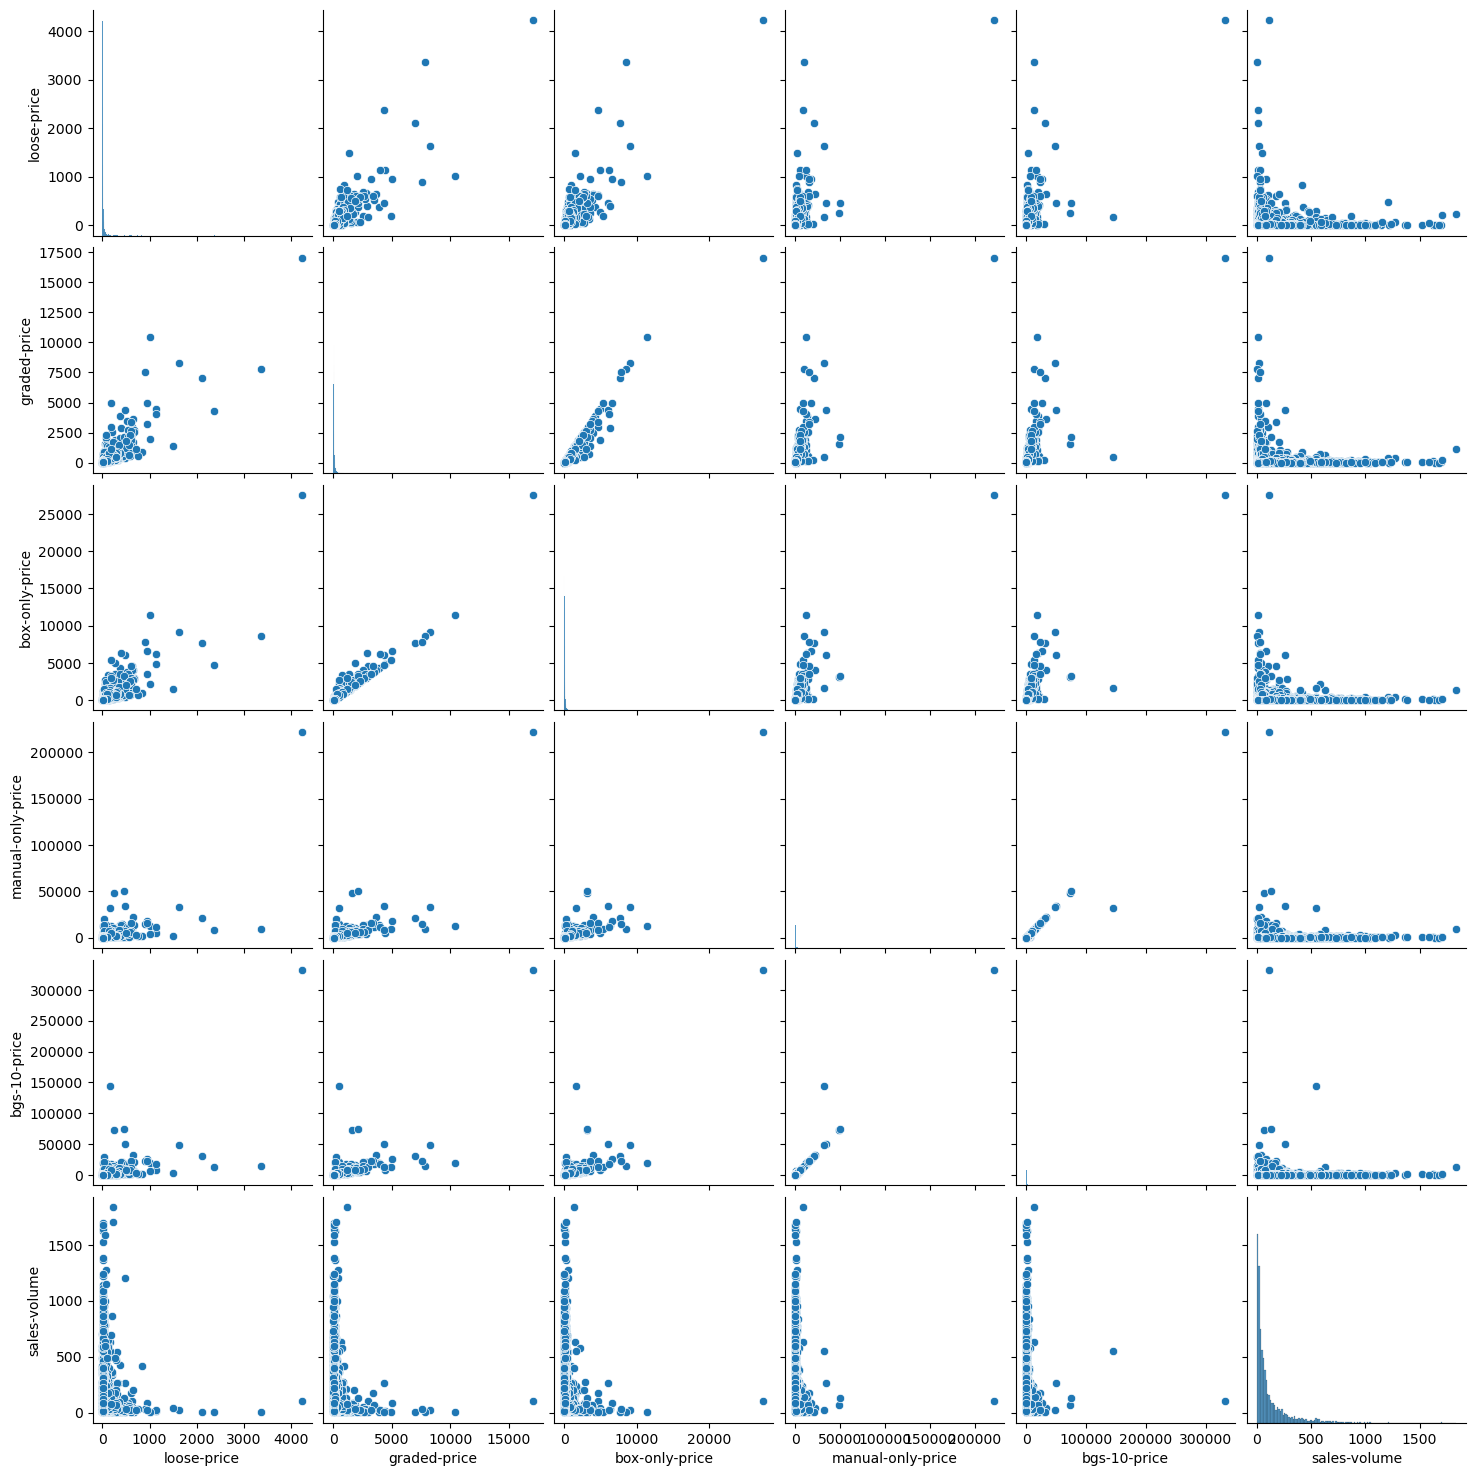

In [21]:
selected_columns = ['loose-price', 'graded-price', 'box-only-price', 
                      'manual-only-price','bgs-10-price', 'sales-volume']  
price_guide_subset = box_only_price_sub[selected_columns]

sns.pairplot(price_guide_subset)
plt.show()

## `bgs-10-price`

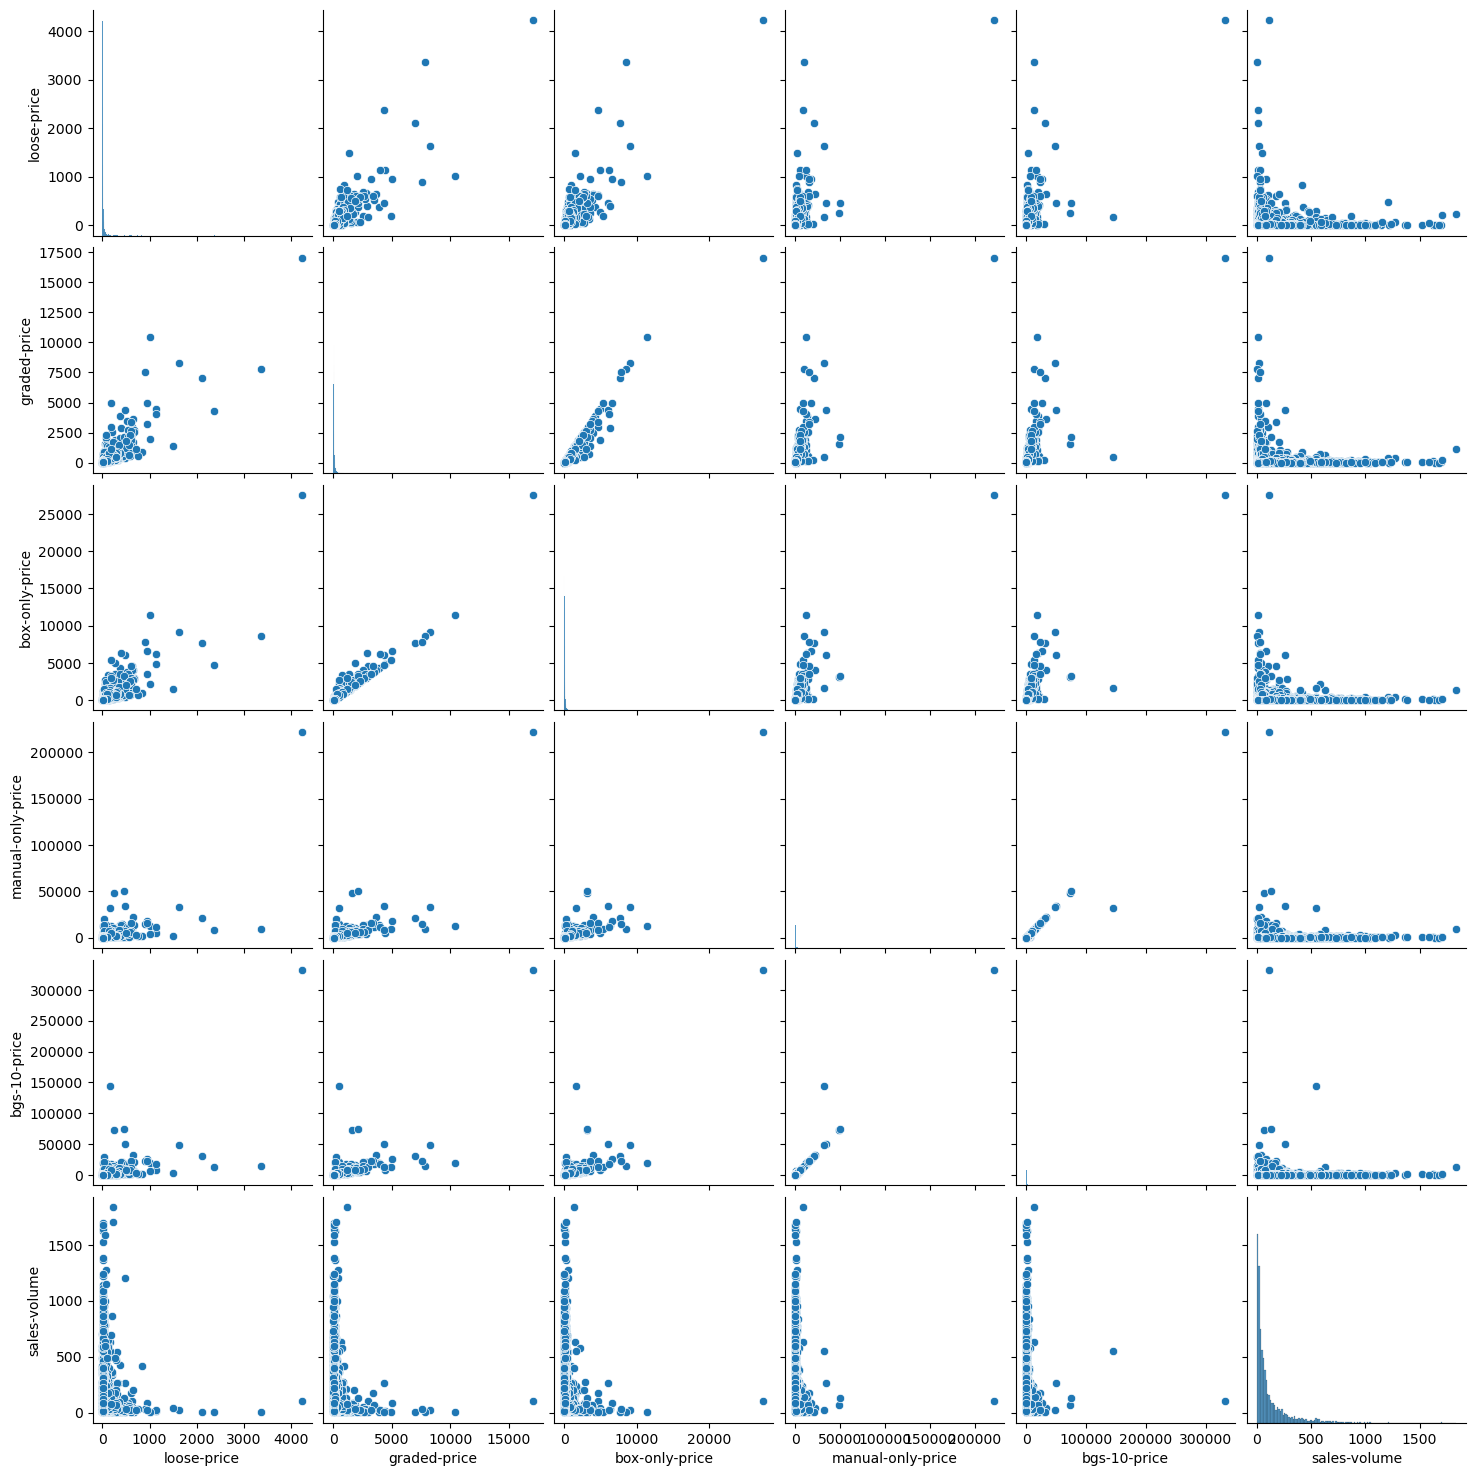

In [23]:
selected_columns = ['loose-price', 'graded-price', 'box-only-price', 
                      'manual-only-price','bgs-10-price', 'sales-volume']  
price_guide_subset = bgs_price_sub[selected_columns]

sns.pairplot(price_guide_subset)
plt.show()

# Heatmap 

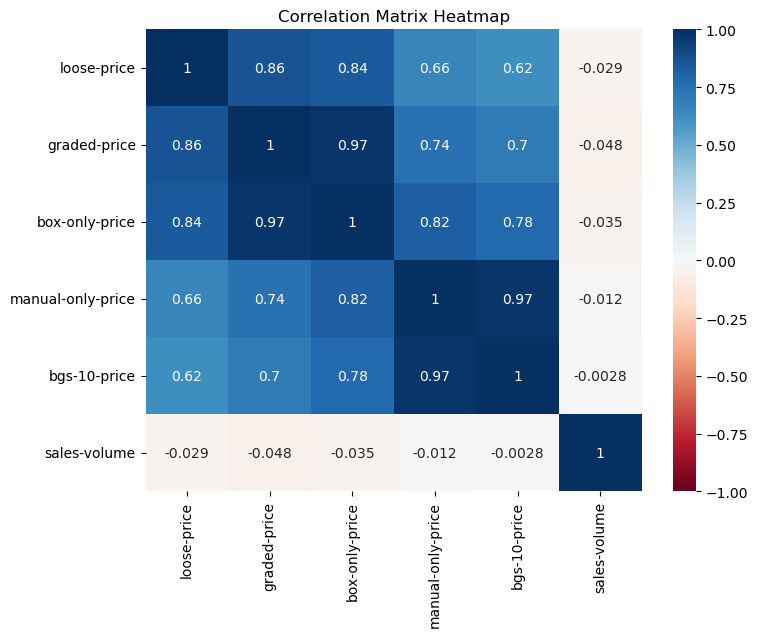

In [25]:
columns_for_corr = price_guide_subset

corr_matrix = columns_for_corr.corr(method="pearson")
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, center=0, vmin=-1, vmax=1, annot=True, cmap='RdBu')
plt.title("Correlation Matrix Heatmap")
plt.show()

# Plotting relationships with `console-name` as categories:

## TODO: add inderence

In [27]:
print('Number of unique values in the console-name columns', price_guide['console-name'].nunique())
print('   ')
print('Top 3 uniquely occuring console-name values: ')
print(price_guide['console-name'].value_counts().head(4))

Number of unique values in the console-name columns 514
   
Top 3 uniquely occuring console-name values: 
console-name
Pokemon Promo                1555
Pokemon 2000 Topps Chrome     604
Pokemon Japanese Promo        547
Pokemon Scarlet & Violet      544
Name: count, dtype: int64


In [32]:
subset = ['loose-price', 'graded-price', 'box-only-price', 'cib-price',
                          'manual-only-price', 'bgs-10-price', 
                          'console-name', 'condition-17-price', 'condition-18-price']

price_guide_subset = price_guide[subset]
top_three_consoles = price_guide_subset['console-name'].value_counts().head(3).index

# Use .loc to create the filtered DataFrame and avoid SettingWithCopyWarning
console_df = price_guide_subset.loc[price_guide_subset['console-name'].isin(top_three_consoles)].copy()
console_df['console-name'] = console_df['console-name'].astype('category')

# sns.pairplot(console_df, hue='console-name')


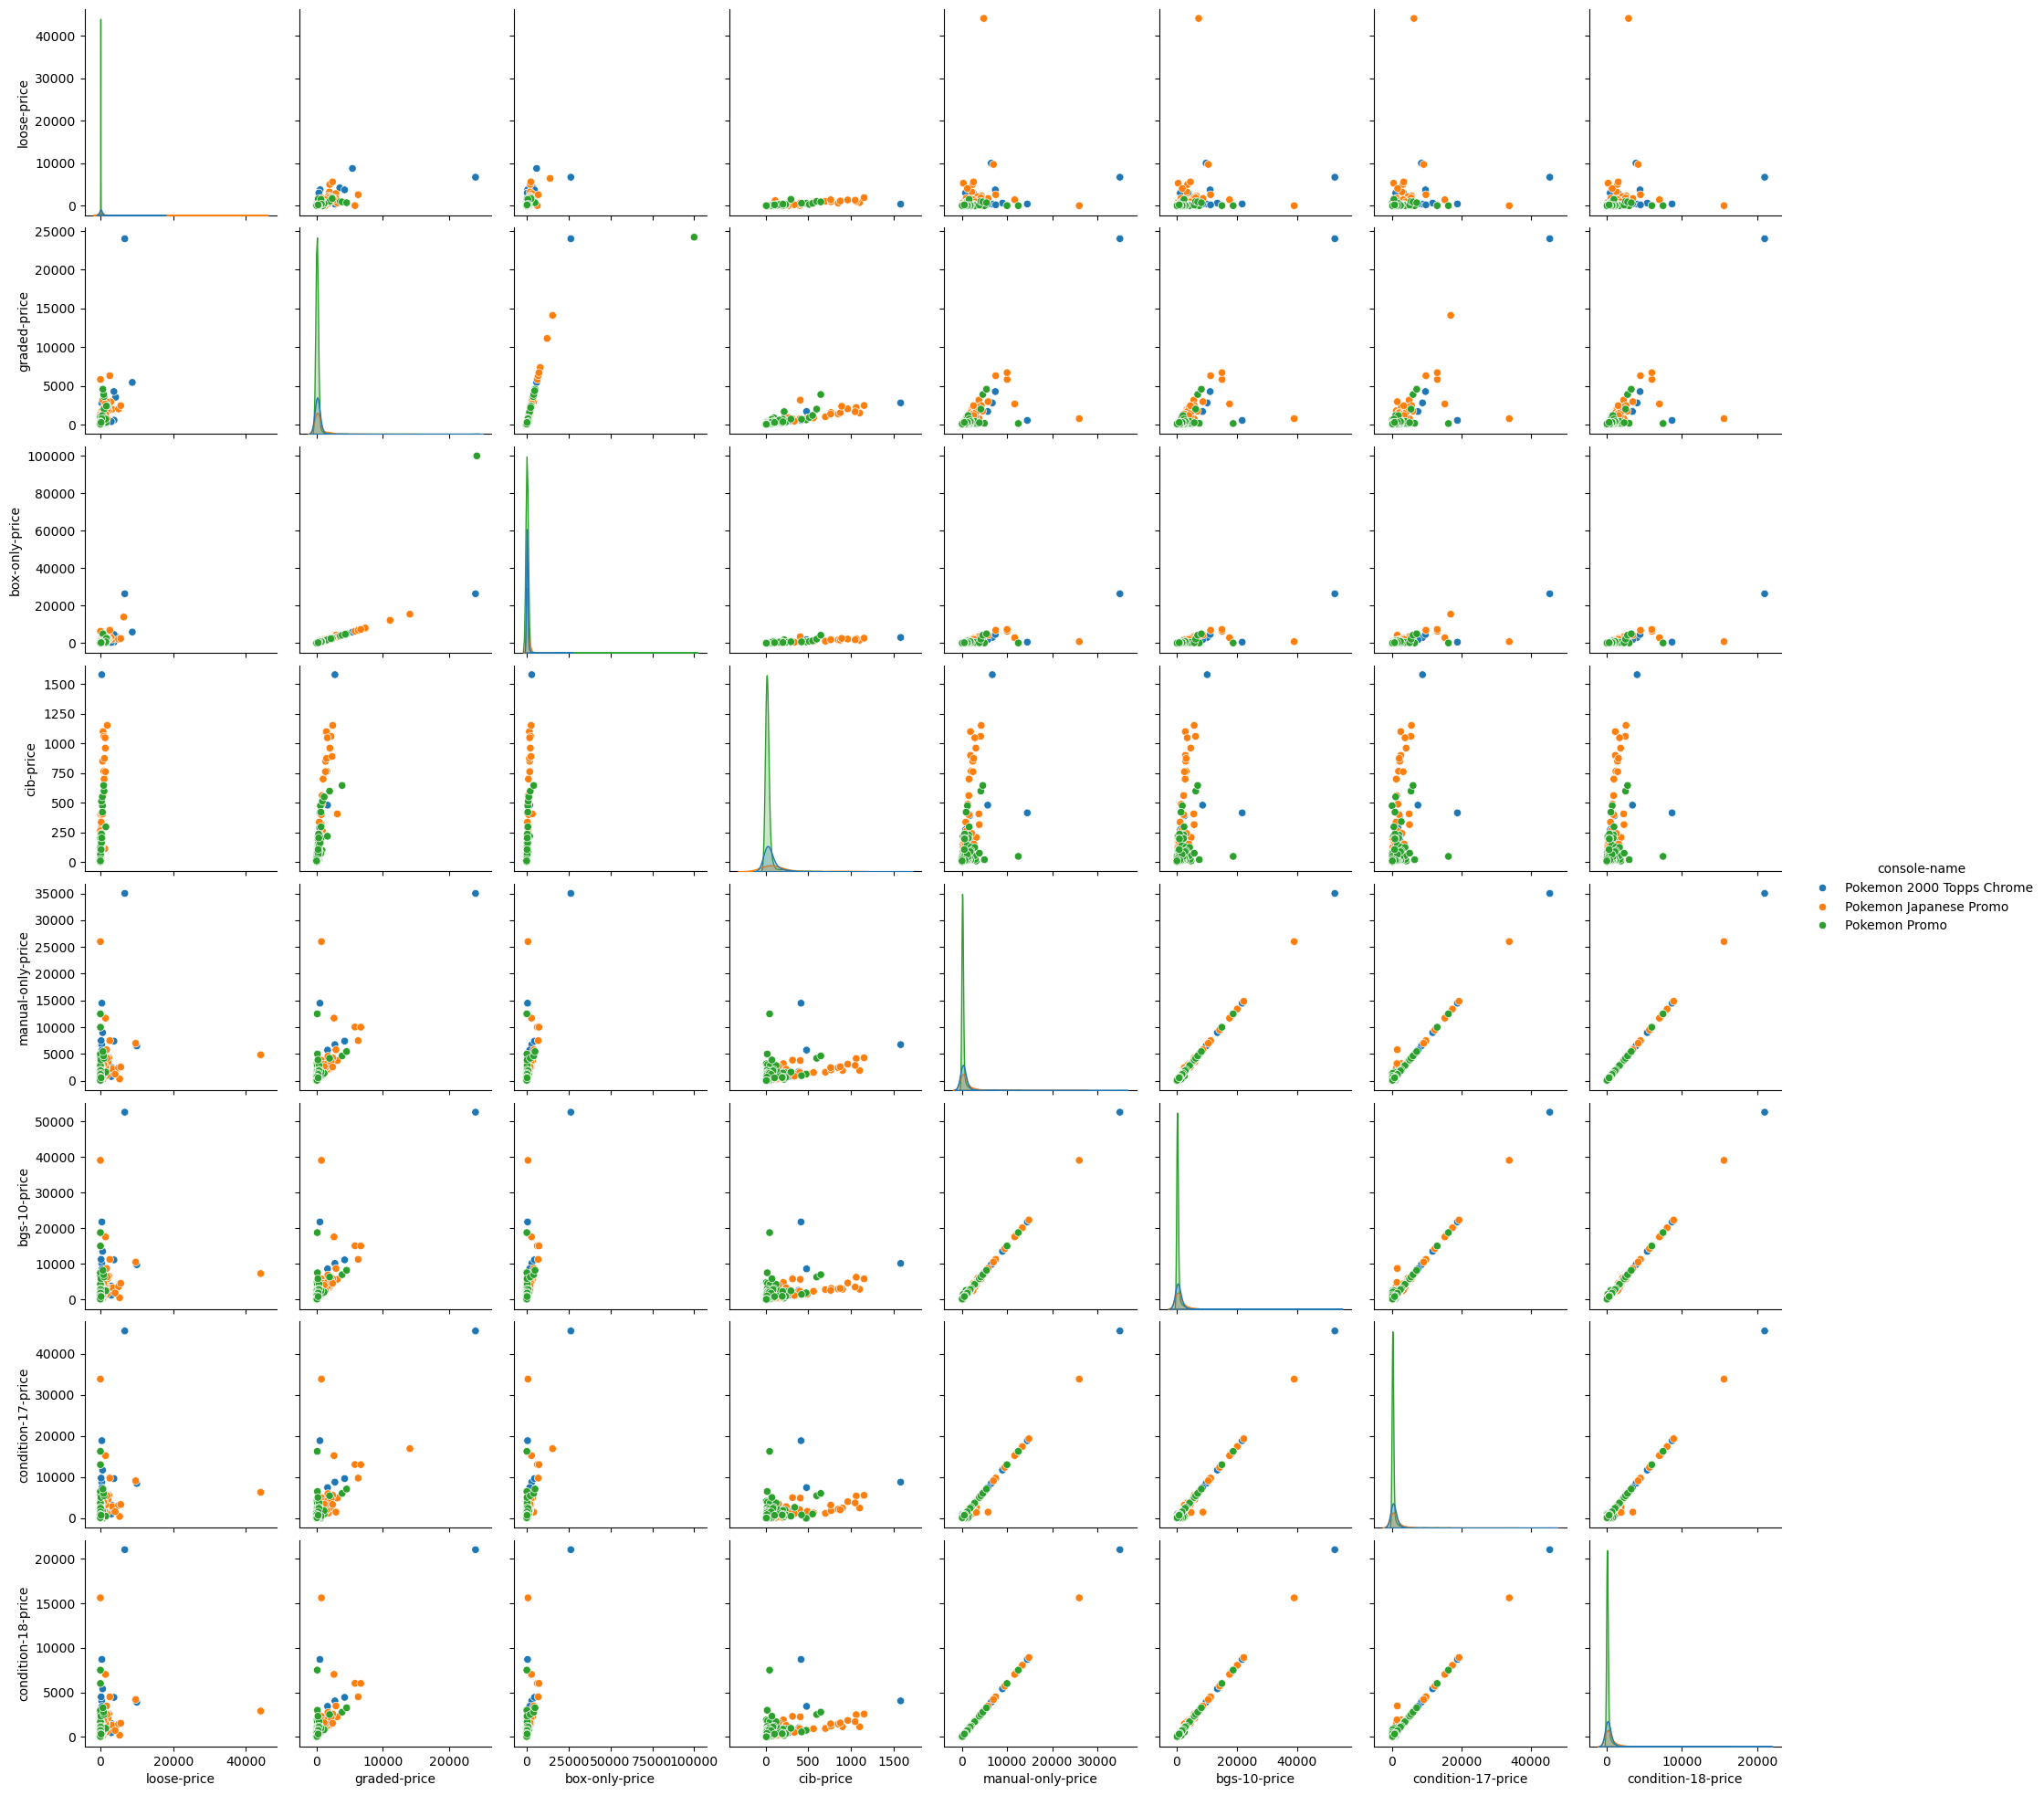

In [34]:
sns.pairplot(console_df, hue='console-name')

# Milestone 3, Pre-processing TODO List

### 1. Outlier Removal

In [36]:
price_guide_subset.describe()

,loose-price,graded-price,box-only-price,cib-price,manual-only-price,bgs-10-price,condition-17-price,condition-18-price
count,54275.000000,36605.000000,36850.000000,10908.000000,36884.000000,36899.000000,37141.000000,36894.000000
mean,36.691095,55.133363,67.979626,38.647100,182.943166,279.807048,183.063660,109.661388
std,869.980525,337.972792,644.853617,153.241722,1454.547467,2299.549069,926.278204,872.372185
min,0.010000,0.140000,0.020000,0.010000,0.980000,0.990000,1.000000,1.000000
25%,1.420000,12.070000,13.000000,8.347500,34.570000,52.000000,39.000000,21.000000
50%,2.360000,17.040000,19.000000,14.000000,43.325000,66.000000,50.000000,26.000000
75%,5.990000,33.590000,38.000000,26.000000,98.432500,150.000000,108.000000,59.000000
max,151092.060000,24200.000000,100000.000000,7989.410000,221599.740000,332400.000000,64743.000000,132960.000000


The summary statistics indicate that the standard deviations across multiple columns are extremely high relative to their means, suggesting a wide spread of values within each variable. For instance, `loose-price` has a standard deviation of 869.98, while its mean is only 36.69. Similarly, `graded-price`, `box-only-price`, and `manual-only-price` all display substantial variability with standard deviations much larger than their respective means.


This high variability indicates the presence of outliers. This can also be seen from our pairplots in the previous sections where there are some scatter-points really away from the clusters. Therefore, for the pre-processing stage, we will apply z-score normalization and drop extreme values (i.e. when the z-score is greater than 3 for some value). This will allow us to reveal the underlying shape of the distribution. 

### 3. Categorical variable encoding 